In [11]:
from matplotlib.patches import Patch
import matplotlib.pyplot as plt
import nbformat as nbf
import numpy as np
import pandas as pd
import plotly.graph_objects as go
import plotly.io as pio 
import seaborn as sns
pio.renderers.default = "browser"

In [12]:
df = pd.read_csv("../data/prostate_cancer_dataset.csv")[["diagnosis_result"]]
for x in df.iterrows():
    if x[1][0] == "M":
        df.at[x[0], "diagnosis_result"] = "Malignant"
    else:
        df.at[x[0], "diagnosis_result"] = "Benign"
df

C:\Users\randr\AppData\Local\Temp\ipykernel_12868\3906622901.py:3: FutureWarning:

Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`



,diagnosis_result
0,Malignant
1,Benign
2,Malignant
3,Malignant
4,Malignant
...,...
95,Malignant
96,Benign
97,Benign
98,Benign


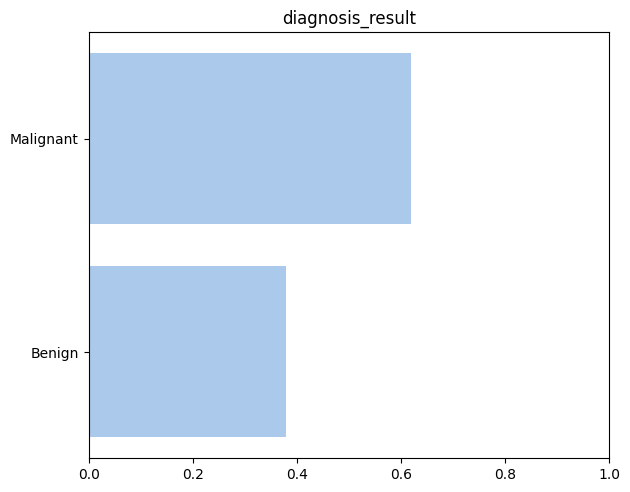

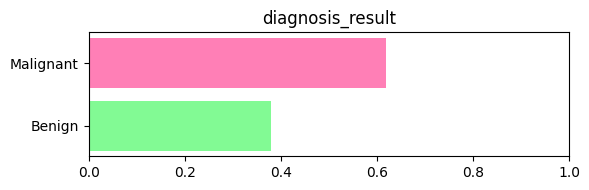

In [ ]:
col = "diagnosis_result"

serie = df[col].value_counts(normalize=True)
serie.sort_values(inplace=True, ascending=False)
sns.set_color_codes("pastel")
sns.barplot(x= serie.values, y= [x for x in list(serie.index)], orient='h', color="b")
plt.xlabel('')
plt.ylabel('')
plt.xlim(0, 1.0)
plt.tight_layout()
plt.title(col)
plt.show()

fig, ax = plt.subplots(figsize=(6, max(2, 0.35 * len(serie))))
labels = list(serie.index)
values = list(serie.values)
y_pos = np.arange(len(labels))

# palette pastel
# cmap = plt.get_cmap("Pastel2")
# colors = [cmap(i / max(1, len(labels) - 1)) for i in range(len(labels))]
colors = ["#ff002b", "#07f72b"]

bars = ax.barh(y_pos, values, color=colors, alpha=0.7)
ax.set_yticks(y_pos)
ax.set_yticklabels(labels)
ax.invert_yaxis()  
ax.set_xlabel("")
ax.set_ylabel("")
ax.set_xlim(0, 1.0)
ax.set_title(col)
ax = plt.gca()
for patch in ax.patches:
    patch.set_alpha(0.5)
plt.tight_layout()
plt.show()

In [5]:
df = pd.read_csv("../data/prostate_cancer_dataset.csv")[["radius","texture","perimeter","area","smoothness","compactness","symmetry","fractal_dimension"]]
rounded_corr_matrix = df.corr().round(2)
rounded_corr_matrix


,radius,texture,perimeter,area,smoothness,compactness,symmetry,fractal_dimension
radius,1.00,0.10,-0.24,-0.25,-0.13,-0.19,-0.04,-0.03
texture,0.10,1.00,-0.11,-0.11,0.10,0.03,0.08,0.14
perimeter,-0.24,-0.11,1.00,0.98,0.27,0.53,0.20,-0.20
area,-0.25,-0.11,0.98,1.00,0.21,0.42,0.11,-0.27
smoothness,-0.13,0.10,0.27,0.21,1.00,0.47,0.42,0.37
compactness,-0.19,0.03,0.53,0.42,0.47,1.00,0.68,0.65
symmetry,-0.04,0.08,0.20,0.11,0.42,0.68,1.00,0.57
fractal_dimension,-0.03,0.14,-0.20,-0.27,0.37,0.65,0.57,1.00


<Axes: >

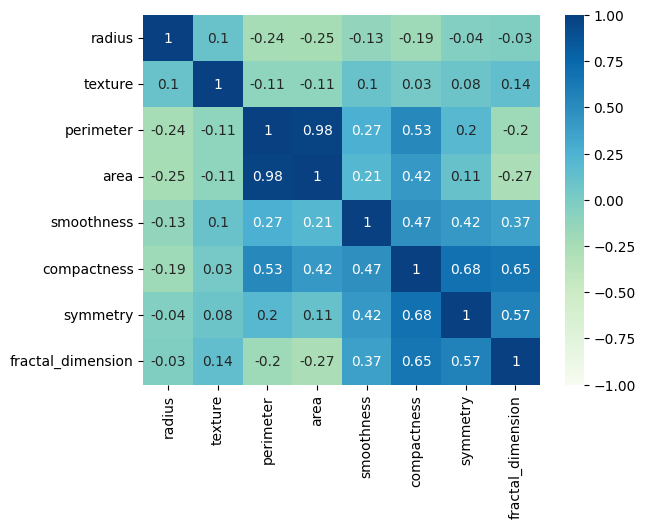

In [6]:
sns.heatmap(rounded_corr_matrix, annot=True, cmap="GnBu", vmin=-1, vmax=1)